In [206]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [207]:
# read the data
# data = pd.read_csv('C:\\Users\\Administrator\\Desktop\\Apziva\\Project\\Potential Talents\\potential-talents - Aspiring human resources - seeking human resources.csv')
data = pd.read_csv('C:\\Users\\selene\\Desktop\\potential-talents - Aspiring human resources - seeking human resources.csv')

In [208]:
# explore data
data.head(5)

,id,job_title,location,connection,fit
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN


In [209]:
data.shape

(104, 5)

In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          104 non-null    int64  
 1   job_title   104 non-null    object 
 2   location    104 non-null    object 
 3   connection  104 non-null    object 
 4   fit         0 non-null      float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.2+ KB


In [211]:
# put the label of job_title as 'Aspiring Human Resources'or'seeking human resources' as 1, and the rest as 0
data_label_1 = data[data['job_title'].str.contains('Aspiring Human Resources','seeking human resources')== True]
data_label_1.loc[:,'fit'] = 1
data_label_0 = data[data['job_title'].str.contains('Aspiring Human Resources','seeking human resources')== False]
data_label_0.loc[:,'fit'] = 0


E:\anaconda\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [212]:
#combine label 1 and label 0 data，the sort index
data = pd.concat([data_label_1,data_label_0],axis=0)
data.sort_index()

,id,job_title,location,connection,fit
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,0
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,0
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,1
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,0
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,0
...,...,...,...,...,...
99,100,Aspiring Human Resources Manager | Graduating ...,"Cape Girardeau, Missouri",103,1
100,101,Human Resources Generalist at Loparex,"Raleigh-Durham, North Carolina Area",500+,0
101,102,Business Intelligence and Analytics at Travelers,Greater New York City Area,49,0
102,103,Always set them up for Success,Greater Los Angeles Area,500+,0


In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 2 to 103
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          104 non-null    int64 
 1   job_title   104 non-null    object
 2   location    104 non-null    object
 3   connection  104 non-null    object
 4   fit         104 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 4.9+ KB


In [214]:
# check missing value
data.isnull().sum()

id            0
job_title     0
location      0
connection    0
fit           0
dtype: int64

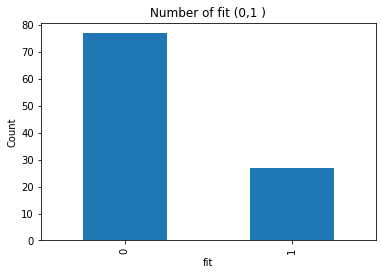

In [215]:
# check data balanced, 0 class is more than 1
plt.figure()
pd.Series(data['fit']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("fit")
plt.title('Number of fit (0,1 )');

In [216]:
# wordcloud graph
from wordcloud import WordCloud, STOPWORDS
def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    more_stopwords = {'u','im'}
    stopwords = stopwords.union(more_stopwords)
    wordcloud = WordCloud(background_color = 'white',
                          stopwords = stopwords,
                          max_words = 60,
                          max_font_size = 50)
    wordcloud.generate(str(text))
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

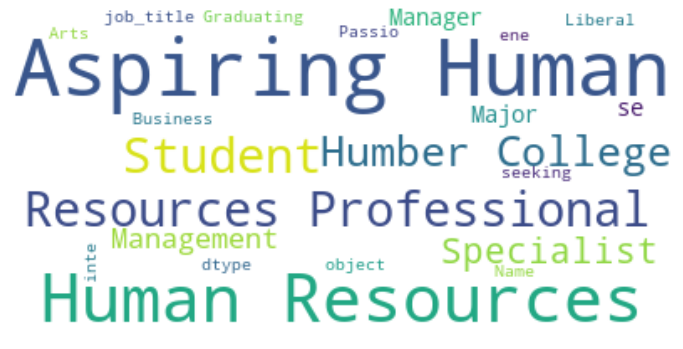

In [217]:
# label as 1
create_wordcloud(data[data['fit']==1]['job_title'])

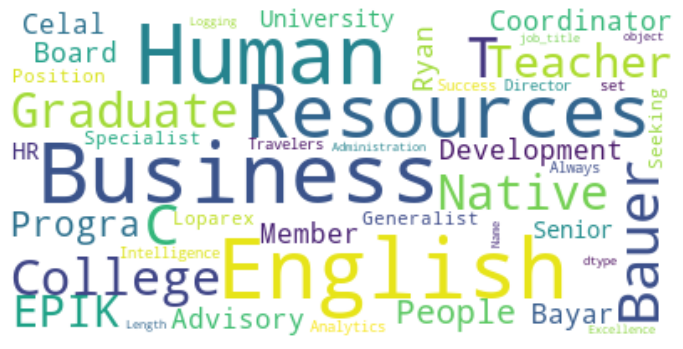

In [218]:
# label as 0
create_wordcloud(data[data['fit']==0]['job_title'])

In [219]:
# cut the connection variable as 1,2,3,4, the larger the higher rank 
data['connection'] = data['connection'].str.split('+').str[0]
data['connection'] = data['connection'].astype(int)
list = data['connection'].tolist()
list.sort()
# print(list)
data['connection'] = pd.cut(data['connection'],[0,40,200,499,600],labels=[1,2,3,4]) 
data['connection'] = data['connection'].astype('int')

In [220]:
# one hot encoding location variable
dum_key = pd.get_dummies(data['location'])
data = data.drop('location', 1)


C:\Users\selene\AppData\Local\Temp/ipykernel_78056/3855398530.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('location', 1)


In [221]:
# combine dummy data and previous data
data = pd.concat([data,dum_key],axis=1)
data.head(5)

,id,job_title,connection,fit,Amerika Birleşik Devletleri,"Atlanta, Georgia","Austin, Texas Area","Baltimore, Maryland","Baton Rouge, Louisiana Area","Bridgewater, Massachusetts",...,"Milpitas, California","Monroe, Louisiana Area","Myrtle Beach, South Carolina Area","New York, New York","Raleigh-Durham, North Carolina Area",San Francisco Bay Area,"San Jose, California","Torrance, California","Virginia Beach, Virginia","İzmir, Türkiye"
2,3,Aspiring Human Resources Professional,2,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,6,Aspiring Human Resources Specialist,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Student at Humber College and Aspiring Human R...,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,Student at Humber College and Aspiring Human R...,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,17,Aspiring Human Resources Professional,2,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [222]:
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import re 
import string 
def removestopwords(text):
    stop_words = set(stopwords.words('english'))
#     print(stop_words)
    text = re.sub(r'[^\w\s]', " ", text)
    text  = [word for word in text.split() if word not in stop_words]
    
    return text    

def lemmatization(text):
    words = removestopwords(text)
#     print(words)
#     words = word_tokenize(words)
#     word_tagged = pos_tag(words)
#     print( word_tagged)
    lemmatizer = WordNetLemmatizer()
    text = " ".join([lemmatizer.lemmatize(word) for word in words])
    return text
    

In [223]:
data['job_title'] = data['job_title'].apply(lambda x: lemmatization(x))
data['job_title'] 

2                  Aspiring Human Resources Professional
5                    Aspiring Human Resources Specialist
6      Student Humber College Aspiring Human Resource...
8      Student Humber College Aspiring Human Resource...
16                 Aspiring Human Resources Professional
                             ...                        
98                      Seeking Human Resources Position
100                   Human Resources Generalist Loparex
101            Business Intelligence Analytics Travelers
102                                   Always set Success
103        Director Of Administration Excellence Logging
Name: job_title, Length: 104, dtype: object

In [224]:

# TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data['job_title'])
X = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names())
data = pd.concat([data,X],axis=1)
data.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 103
Columns: 234 entries, id to world
dtypes: float64(189), int32(1), int64(2), object(1), uint8(41)
memory usage: 161.4+ KB


In [225]:
data.head(5)

,id,job_title,connection,fit,Amerika Birleşik Devletleri,"Atlanta, Georgia","Austin, Texas Area","Baltimore, Maryland","Baton Rouge, Louisiana Area","Bridgewater, Massachusetts",...,undergraduate,university,victoria,wellington,western,westfield,within,woodlands,work,world
0,1,2019 C T Bauer College Business Graduate Magna...,2,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Native English Teacher EPIK English Program Korea,4,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Aspiring Human Resources Professional,2,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,People Development Coordinator Ryan,4,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Advisory Board Member Celal Bayar University,4,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [226]:
#PCA reduce dimension
y = data['fit']
x = data.drop(['id','fit','job_title'], axis=1)
from sklearn.decomposition import PCA
pca = PCA(n_components=60)
pca.fit(x)
x = pca.transform(x)
x

array([[ 0.78364354, -0.00978828,  0.86398258, ..., -0.01129865,
         0.00767294, -0.01083615],
       [-1.28386854,  1.07554798,  0.21548995, ...,  0.00708739,
         0.0303884 ,  0.00705881],
       [ 0.72417456, -0.31673552,  0.35244002, ...,  0.06071811,
         0.03581164,  0.01155369],
       ...,
       [ 0.79001188, -0.08308413, -0.33452862, ..., -0.0879691 ,
        -0.17233459,  0.03559324],
       [-1.26233117, -0.12170917, -0.15173028, ..., -0.0087776 ,
         0.01197727, -0.00492153],
       [-1.25979365, -0.12399784, -0.15516844, ..., -0.00975535,
         0.01050048, -0.00623503]])

In [227]:
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.783644,-0.009788,0.863983,0.463792,-0.044852,-0.128824,-0.119374,-0.244416,0.462994,-0.239201,...,-0.017951,-0.018331,0.017540,-0.008850,-0.007425,-0.018120,-0.001141,-0.011299,0.007673,-0.010836
1,-1.283869,1.075548,0.215490,-0.061393,0.176815,0.005630,-0.012927,-0.187166,0.004836,-0.024885,...,-0.043629,0.077782,-0.036653,0.033736,0.001543,0.053695,-0.009075,0.007087,0.030388,0.007059
2,0.724175,-0.316736,0.352440,-0.698089,0.691070,-0.063691,0.161909,0.100335,-0.111133,-0.364145,...,0.005217,-0.049400,-0.005983,0.007276,0.036676,-0.049857,-0.021114,0.060718,0.035812,0.011554
3,-1.311696,-0.290371,0.447242,-0.414995,0.008170,0.518676,0.323653,-0.542005,-0.300555,-0.149204,...,-0.029735,-0.029119,-0.040973,0.002194,-0.037531,-0.043709,0.006003,-0.010970,-0.003026,-0.051918
4,-1.257808,-0.022536,0.623377,0.391118,0.026024,-0.237910,-0.193523,-0.004261,-0.306455,0.186894,...,-0.032594,-0.075949,0.041877,0.026013,-0.002029,-0.139245,0.099229,-0.194842,0.087996,0.113220


# Model Training

In [228]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  
from sklearn.metrics import precision_score                         
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
# y = data['fit']
# x = data.drop(['id','fit','job_title'], axis=1)
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.4, random_state=26)
scoring = 'accuracy'
kfold = StratifiedKFold(n_splits=5, shuffle=True , random_state = 47)
model= LogisticRegression()
cv_results = cross_val_score(model,x_train,y_train, cv=kfold, scoring=scoring)
[cv_results.mean()-cv_results.std(),cv_results.mean()+cv_results.std()]



[0.6939492219249446, 0.9496405216647992]

In [229]:
# Test Model
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print('LogisticRegression Classifier Accuracy: {:.3f}'.format(accuracy_score(y_test, y_predict)))
print('\nLogisticRegression Classifier Precision: {:.3f}'.format(precision_score (y_test, y_predict)))
print('\nLogisticRegression Classifier Recall: {:.3f}'.format(recall_score (y_test, y_predict)))

LogisticRegression Classifier Accuracy: 0.714

LogisticRegression Classifier Precision: 0.500

LogisticRegression Classifier Recall: 0.417


# Threshold setting 

C:\Users\selene\AppData\Local\Temp/ipykernel_78056/1260702102.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\selene\AppData\Local\Temp/ipykernel_78056/1260702102.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\selene\AppData\Local\Temp/ipykernel_78056/1260702102.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\selene\AppData\Local\Temp/ipykernel_78056/1260702102.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\selene\AppData\Local\Temp/ipykernel_78056/1260702102.py:22: DeprecationWarning: scipy.interp is deprecated and will

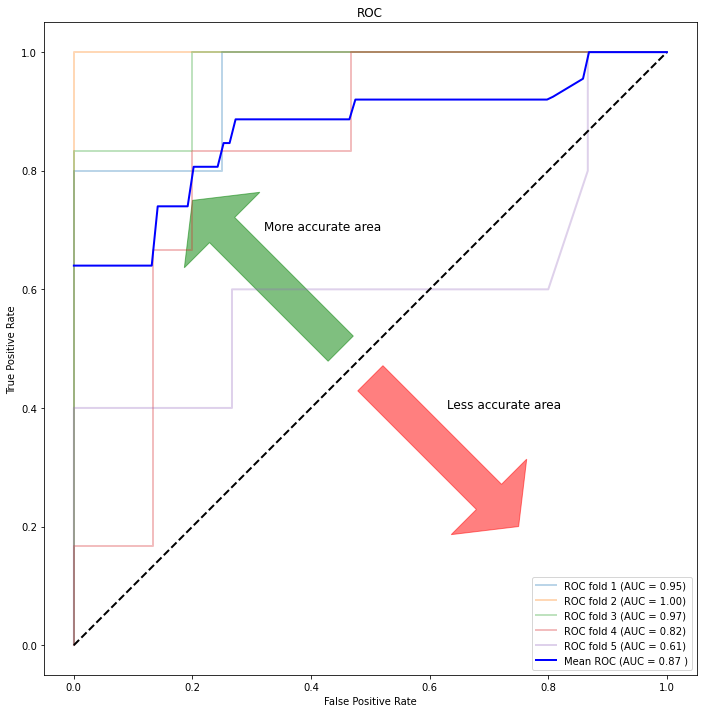

In [230]:
# plot arrows
# roc 
import matplotlib.patches as patches
from sklearn.metrics import roc_curve,auc
from scipy import interp
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in kfold.split(x,y):
    prediction = model.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

<AxesSubplot:title={'center':'Logistic Regression Confusion Matrix'}>

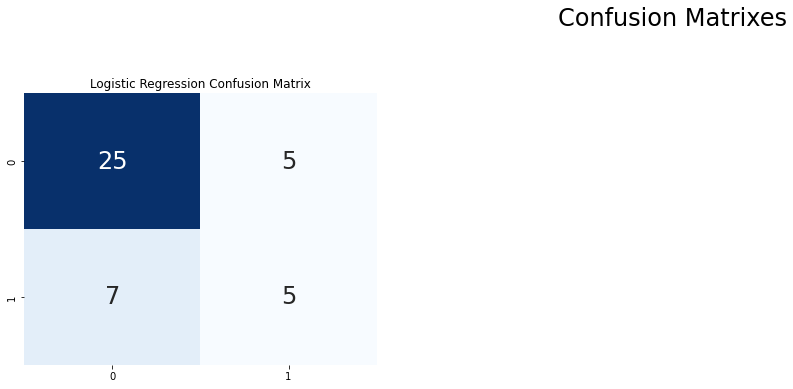

In [231]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test,y_predict)
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(matrix,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

In [232]:
class LogisticRegressionWithThreshold(LogisticRegression):
    def predict(self, X, threshold=None):
        if threshold == None: # If no threshold passed in, simply call the base class predict, effectively threshold=0.5
            return LogisticRegression.predict(self, X)
        else:
            y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
            y_pred_with_threshold = (y_scores >= threshold).astype(int)

            return y_pred_with_threshold
    
    def threshold_from_optimal_tpr_minus_fpr(self, X, y):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        fpr, tpr, thresholds = roc_curve(y, y_scores) 

        optimal_idx = np.argmax(tpr - fpr)

        return thresholds[optimal_idx], tpr[optimal_idx] - fpr[optimal_idx]

In [233]:
# search for best threshold
lrt = LogisticRegressionWithThreshold()
lrt.fit(x_train, y_train)

threshold, optimal_tpr_minus_fpr = lrt.threshold_from_optimal_tpr_minus_fpr(x_train, y_train)
y_pred = lrt.predict(x_train, threshold)
print("The best threshold is:{}".format(threshold))


The best threshold is:0.4601683489175681


In [234]:
# Because we need to predict 1 class probability, we drop 0 class probability
Probability = model.predict_proba(x_test)
Probability = pd.DataFrame(Probability, columns=['0','1'])
Probability = Probability.drop(['0'],axis=1)
Probability


,1
0,0.112626
1,0.725282
2,0.189984
3,0.028343
4,0.478801
5,0.012323
6,0.189961
7,0.403979
8,0.819590
9,0.441315


In [250]:
# filter the class 1 probability based on best threshold
Probability = Probability[Probability['1']>0.46]
Probability['1'].sort_values(ascending=False)

40    0.836937
8     0.819590
1     0.725282
36    0.699321
14    0.658024
27    0.633551
19    0.607766
17    0.600871
13    0.561398
38    0.513139
4     0.478801
Name: 1, dtype: float64

In [251]:
# re_ranking sort alogrithmn

def re_ranking(df,col,n):
    rank = df[col].tolist()
    for i in rank:
        if len(rank)>= n:
            rank.sort(reverse=True)
            print('{}th candidate is: {}'.format(n,rank[6]))
            rank.remove(rank[6])
            while len(rank) < n :
                break
        else:
            break 

In [252]:
re_ranking(Probability,'1',7)

7th candidate is: 0.6077657188076705
7th candidate is: 0.6008712352139546
7th candidate is: 0.5613976936096237
7th candidate is: 0.5131390632838622
7th candidate is: 0.47880067322238645
